In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Reading Files

In [75]:
dfa = pd.read_excel('/content/drive/MyDrive/Bonus_prj.xlsx')
dfa

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [76]:
dfa.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

#Exploratory Data Analysis

In [77]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [78]:
dfa.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [79]:
dfa = dfa.dropna()
dfa

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [80]:
dfa["month"] = pd.to_datetime(dfa["Date_of_Journey"], format = "%d/%m/%Y").dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
dfa["day"] = pd.to_datetime(dfa.Date_of_Journey, format="%d/%m/%Y").dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
dfa["year"] = pd.to_datetime(dfa.Date_of_Journey, format="%d/%m/%Y").dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
dfa

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,27,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [84]:
dfa.year.unique()

array([2019])

In [85]:
dfa = dfa.drop(['Date_of_Journey' , 'year'] , axis=1)

In [86]:
dfa["Dep_min"] = pd.to_datetime(dfa["Dep_Time"]).dt.minute

dfa["Dep_hour"] = pd.to_datetime(dfa["Dep_Time"]).dt.hour

dfa.drop(["Dep_Time"], axis = 1, inplace = True)

In [87]:
dfa["Arr_hour"] = pd.to_datetime(dfa.Arrival_Time).dt.hour

dfa["Arr_min"] = pd.to_datetime(dfa.Arrival_Time).dt.minute

dfa.drop(["Arrival_Time"], axis = 1, inplace = True)

In [88]:
dfa

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,20,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,50,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,25,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,5,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,50,16,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,55,19,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,45,20,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,27,20,8,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,30,11,14,10


In [89]:
li = list(dfa["Duration"])

for i in range(len(li)):
    if len(li[i].split()) < 2:    
        if "h" in li[i]:
            li[i] = li[i].strip() + " 0m"  
        else:
            li[i] = "0h " + li[i]           

la = []
lb = []
for i in li:
    la.append(int(i.split(sep = "h")[0]))    
    lb.append(int(i.split(sep = "m")[0].split()[-1]))   

In [90]:
dfa["Dur_hours"] = la
dfa["Dur_mins"] = lb

In [91]:
dfa = dfa.drop(["Duration"], axis = 1)

In [92]:
dfa

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,50,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,18,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,50,16,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,55,19,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,45,20,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,20,8,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,30,11,14,10,2,40


In [93]:
dfa.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
month               int64
day                 int64
Dep_min             int64
Dep_hour            int64
Arr_hour            int64
Arr_min             int64
Dur_hours           int64
Dur_mins            int64
dtype: object

#Visualisations

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

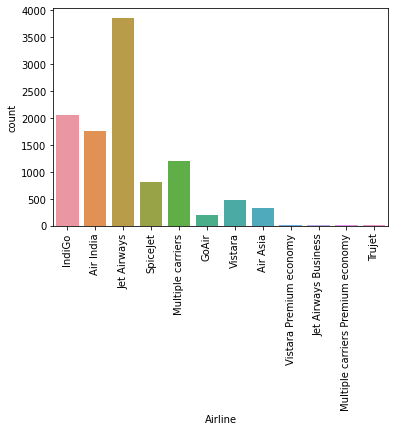

In [94]:
sns.countplot(x='Airline', data=dfa).set_xticklabels(labels=(dfa['Airline'].unique()).tolist() ,rotation=90)

[Text(0, 0, 'Banglore'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Mumbai')]

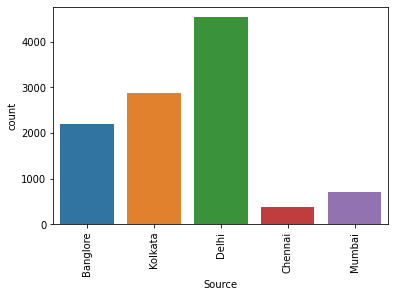

In [95]:
sns.countplot(x='Source', data=dfa).set_xticklabels(labels=(dfa['Source'].unique()).tolist() ,rotation=90)

[Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Banglore'),
 Text(0, 0, 'Cochin'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Hyderabad')]

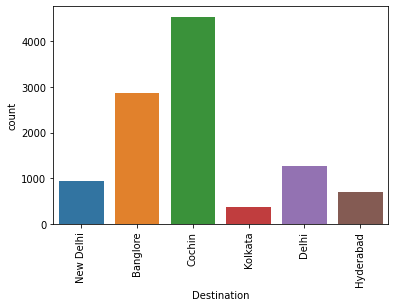

In [96]:
sns.countplot(x='Destination', data=dfa).set_xticklabels(labels=(dfa['Destination'].unique()).tolist() ,rotation=90)

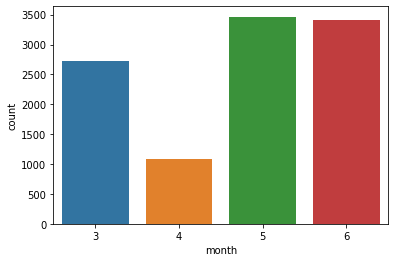

In [97]:
sns.countplot(x='month', data=dfa)

In [98]:
dfa.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

#Solving the Routes' problem

In [99]:
dfa.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [100]:
# dfa = dfa.drop(['Route'], axis=1)

In [101]:
dfa

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,50,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,9,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,18,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,50,16,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,55,19,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,45,20,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,20,8,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,30,11,14,10,2,40


In [102]:
dfa['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [103]:
dfa['city1']=dfa['Route'].astype(str).str.split('→').str[0]
dfa['city2']=dfa['Route'].astype(str).str.split('→').str[1]
dfa['city3']=dfa['Route'].astype(str).str.split('→').str[2]
dfa['city4']=dfa['Route'].astype(str).str.split('→').str[3]
dfa['city5']=dfa['Route'].astype(str).str.split('→').str[4]

In [104]:
dfa = dfa.drop(['Route'], axis=1)

In [105]:
dfa

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins,city1,city2,city3,city4,city5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,20,22,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,50,5,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,25,9,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,5,18,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,50,16,21,35,4,45,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,4,9,55,19,22,25,2,30,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,4,27,45,20,23,20,2,35,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,4,27,20,8,11,20,3,0,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,3,1,30,11,14,10,2,40,BLR,DEL,NaN,NaN,NaN


In [106]:
dfa.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
month                  0
day                    0
Dep_min                0
Dep_hour               0
Arr_hour               0
Arr_min                0
Dur_hours              0
Dur_mins               0
city1                  0
city2                  0
city3               3491
city4               9116
city5              10636
dtype: int64

In [107]:
col = list(dfa.columns)[0:5]
col

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [108]:
col2 = list(dfa.columns)[14:19]
col2

['city1', 'city2', 'city3', 'city4', 'city5']

In [109]:
for i in col2:
  col.append(i)

col

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'city1',
 'city2',
 'city3',
 'city4',
 'city5']

#Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder

for i in col:
  le = LabelEncoder()
  le.fit(dfa[i])
  dfa[i] = le.fit_transform(dfa[i])

In [111]:
dfa

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins,city1,city2,city3,city4,city5
0,3,0,5,4,8,3897,3,24,20,22,1,10,2,50,0,13,29,13,5
1,1,3,0,1,8,7662,5,1,50,5,13,15,7,25,2,25,1,3,5
2,4,2,1,1,8,13882,6,9,25,9,4,25,19,0,3,32,4,5,5
3,3,3,0,0,8,6218,5,12,5,18,23,30,5,25,2,34,3,13,5
4,3,0,5,0,8,13302,3,1,50,16,21,35,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,4,9,55,19,22,25,2,30,2,5,29,13,5
10679,1,3,0,4,8,4145,4,27,45,20,23,20,2,35,2,5,29,13,5
10680,4,0,2,4,8,7229,4,27,20,8,11,20,3,0,0,13,29,13,5
10681,10,0,5,4,8,12648,3,1,30,11,14,10,2,40,0,13,29,13,5


In [112]:
dfa.Additional_Info.unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

#Standardizing

In [113]:
dfa.dtypes

Airline            int64
Source             int64
Destination        int64
Total_Stops        int64
Additional_Info    int64
Price              int64
month              int64
day                int64
Dep_min            int64
Dep_hour           int64
Arr_hour           int64
Arr_min            int64
Dur_hours          int64
Dur_mins           int64
city1              int64
city2              int64
city3              int64
city4              int64
city5              int64
dtype: object

In [114]:
dcopy = dfa.copy(deep = True)
dcopy

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins,city1,city2,city3,city4,city5
0,3,0,5,4,8,3897,3,24,20,22,1,10,2,50,0,13,29,13,5
1,1,3,0,1,8,7662,5,1,50,5,13,15,7,25,2,25,1,3,5
2,4,2,1,1,8,13882,6,9,25,9,4,25,19,0,3,32,4,5,5
3,3,3,0,0,8,6218,5,12,5,18,23,30,5,25,2,34,3,13,5
4,3,0,5,0,8,13302,3,1,50,16,21,35,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,4,9,55,19,22,25,2,30,2,5,29,13,5
10679,1,3,0,4,8,4145,4,27,45,20,23,20,2,35,2,5,29,13,5
10680,4,0,2,4,8,7229,4,27,20,8,11,20,3,0,0,13,29,13,5
10681,10,0,5,4,8,12648,3,1,30,11,14,10,2,40,0,13,29,13,5


In [115]:
from sklearn.preprocessing import StandardScaler
scaled_features = dfa.copy()
 
cols = ['Dur_hours', 'Dur_mins','Dep_hour','Dep_min','Arr_hour','Arr_min']
features = dcopy[cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
dcopy[cols] = features
dcopy

data = dcopy
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins,city1,city2,city3,city4,city5
0,3,0,5,4,8,3897,3,24,-0.234950,1.654154,-1.800436,-0.890014,-0.970614,1.279041,0,13,29,13,5
1,1,3,0,1,8,7662,5,1,1.363607,-1.303113,-0.050909,-0.587094,-0.381999,-0.196319,2,25,1,3,5
2,4,2,1,1,8,13882,6,9,0.031476,-0.607286,-1.363054,0.018745,1.030677,-1.671678,3,32,4,5,5
3,3,3,0,0,8,6218,5,12,-1.034229,0.958326,1.407030,0.321664,-0.617445,-0.196319,2,34,3,13,5
4,3,0,5,0,8,13302,3,1,1.363607,0.610412,1.115442,0.624584,-0.735168,0.983969,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,4,9,1.630034,1.132283,1.261236,0.018745,-0.970614,0.098753,2,5,29,13,5
10679,1,3,0,4,8,4145,4,27,1.097181,1.306240,1.407030,-0.284175,-0.970614,0.393825,2,5,29,13,5
10680,4,0,2,4,8,7229,4,27,-0.234950,-0.781243,-0.342497,-0.284175,-0.852891,-1.671678,0,13,29,13,5
10681,10,0,5,4,8,12648,3,1,0.297903,-0.259372,0.094885,-0.890014,-0.970614,0.688897,0,13,29,13,5


In [116]:
Y = data.iloc[:,5]
X = data.drop(['Price'], axis=1)
X

,Airline,Source,Destination,Total_Stops,Additional_Info,month,day,Dep_min,Dep_hour,Arr_hour,Arr_min,Dur_hours,Dur_mins,city1,city2,city3,city4,city5
0,3,0,5,4,8,3,24,-0.234950,1.654154,-1.800436,-0.890014,-0.970614,1.279041,0,13,29,13,5
1,1,3,0,1,8,5,1,1.363607,-1.303113,-0.050909,-0.587094,-0.381999,-0.196319,2,25,1,3,5
2,4,2,1,1,8,6,9,0.031476,-0.607286,-1.363054,0.018745,1.030677,-1.671678,3,32,4,5,5
3,3,3,0,0,8,5,12,-1.034229,0.958326,1.407030,0.321664,-0.617445,-0.196319,2,34,3,13,5
4,3,0,5,0,8,3,1,1.363607,0.610412,1.115442,0.624584,-0.735168,0.983969,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4,9,1.630034,1.132283,1.261236,0.018745,-0.970614,0.098753,2,5,29,13,5
10679,1,3,0,4,8,4,27,1.097181,1.306240,1.407030,-0.284175,-0.970614,0.393825,2,5,29,13,5
10680,4,0,2,4,8,4,27,-0.234950,-0.781243,-0.342497,-0.284175,-0.852891,-1.671678,0,13,29,13,5
10681,10,0,5,4,8,3,1,0.297903,-0.259372,0.094885,-0.890014,-0.970614,0.688897,0,13,29,13,5


In [117]:
X.dtypes

Airline              int64
Source               int64
Destination          int64
Total_Stops          int64
Additional_Info      int64
month                int64
day                  int64
Dep_min            float64
Dep_hour           float64
Arr_hour           float64
Arr_min            float64
Dur_hours          float64
Dur_mins           float64
city1                int64
city2                int64
city3                int64
city4                int64
city5                int64
dtype: object

#Splitting Data

In [118]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3)

#Importing Models

In [119]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [120]:
models = []
models.append(DTR())
models.append(RFR())
models.append(KNR())
models.append(GBR())

In [121]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Model is :  DecisionTreeRegressor()
Training score:  0.9969092816832498
R2 score:  0.8014177331767987
MAE:  783.3448777951118
MSE:  4164367.673097591
Model is :  RandomForestRegressor()
Training score:  0.9792718236260833
R2 score:  0.8749822290847411
MAE:  668.4038639379081
MSE:  2621684.061174177
Model is :  KNeighborsRegressor()
Training score:  0.8349157534173961
R2 score:  0.7678638720547772
MAE:  1291.1890171606863
MSE:  4868008.6215039
Model is :  GradientBoostingRegressor()
Training score:  0.8493536135763888
R2 score:  0.8191057444537635
MAE:  1231.4995384815807
MSE:  3793441.388784614


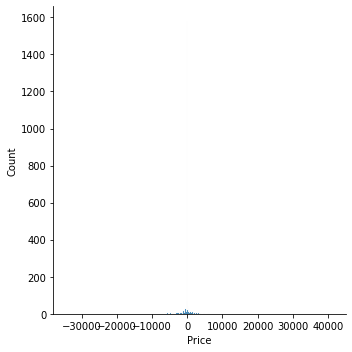

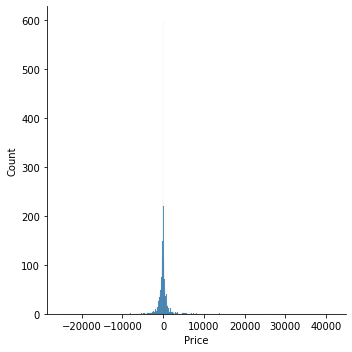

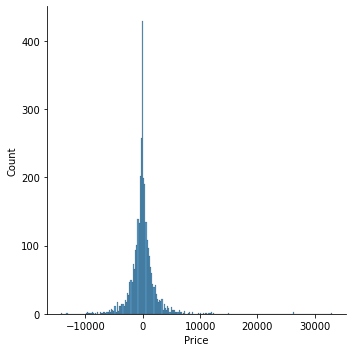

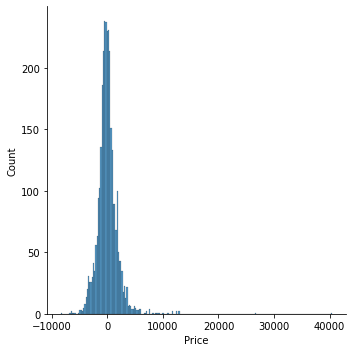

In [122]:
for i in models:
  mdl = i.fit(X_train, Y_train)
  print('Model is : ', i)
  print('Training score: ',mdl.score(X_train,Y_train))
  pred = mdl.predict(X_test)
  print("R2 score: ", (r2_score(Y_test,pred)))
  print("MAE: ", (mean_absolute_error(Y_test,pred)))
  print("MSE: ", (mean_squared_error(Y_test,pred)))
  sns.displot(Y_test-pred)

RandomForestRegressor gives best R2 score and MSE. 
Also RandomForestRegressor gives best MAE.

#Sequential Feature Selection

In [123]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [124]:
!pip install mlxtend

In [125]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [126]:
mdl = DTR()
sfs = SFS(mdl, forward=True, floating=False, k_features = 8, scoring='neg_mean_squared_error')

In [127]:
sfs = sfs.fit(X, Y)
dic = sfs.subsets_

In [128]:
dic

{1: {'avg_score': -11080328.931927107,
  'cv_scores': array([-11537624.09572769, -11937751.1313385 , -10834257.52328289,
          -9688818.14511837, -11403193.76416809]),
  'feature_idx': (14,),
  'feature_names': ('city2',)},
 2: {'avg_score': -8372460.398516284,
  'cv_scores': array([-9341356.72687217, -8054342.054123  , -8147415.90579474,
         -7485602.51099792, -8833584.79479358]),
  'feature_idx': (0, 14),
  'feature_names': ('Airline', 'city2')},
 3: {'avg_score': -6198287.699011895,
  'cv_scores': array([-7146977.46718793, -6256659.96715506, -6285883.56186429,
         -5405788.41610534, -5896129.08274686]),
  'feature_idx': (0, 4, 14),
  'feature_names': ('Airline', 'Additional_Info', 'city2')},
 4: {'avg_score': -5020297.061326307,
  'cv_scores': array([-5737113.4827266 , -4880695.24128169, -5273101.23039367,
         -4426478.49159676, -4784096.8606328 ]),
  'feature_idx': (0, 4, 5, 14),
  'feature_names': ('Airline', 'Additional_Info', 'month', 'city2')},
 5: {'avg_scor

In [129]:
colsfs = list(dic[8]['feature_names'])
colsfs

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'month',
 'day',
 'city2',
 'city4']

In [130]:
df_sfs = pd.DataFrame()
df_sfs
for i in colsfs:
  df_sfs[i] = data[i]
df_sfs['Price'] = Y
df_sfs

,Airline,Source,Destination,Additional_Info,month,day,city2,city4,Price
0,3,0,5,8,3,24,13,13,3897
1,1,3,0,8,5,1,25,3,7662
2,4,2,1,8,6,9,32,5,13882
3,3,3,0,8,5,12,34,13,6218
4,3,0,5,8,3,1,34,13,13302
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,4,9,5,13,4107
10679,1,3,0,8,4,27,5,13,4145
10680,4,0,2,8,4,27,13,13,7229
10681,10,0,5,8,3,1,13,13,12648


In [131]:
X_train2, X_test2, Y_train2, Y_test2 = tts(df_sfs.iloc[:,:-1], df_sfs.iloc[:,-1], test_size=0.3)

Model is :  DecisionTreeRegressor()
Training score:  0.9286958816702842
R2 score:  0.81104122506847
MAE:  894.126043947157
MSE:  4241581.504816656
Model is :  RandomForestRegressor()
Training score:  0.922122070591704
R2 score:  0.8459807806331301
MAE:  866.8314932407421
MSE:  3457288.884782067
Model is :  KNeighborsRegressor()
Training score:  0.8307417611286882
R2 score:  0.75682538276859
MAE:  1161.927550702028
MSE:  5458571.369672387
Model is :  GradientBoostingRegressor()
Training score:  0.8354887307548217
R2 score:  0.7966490869439317
MAE:  1316.7825316790509
MSE:  4564643.648429348


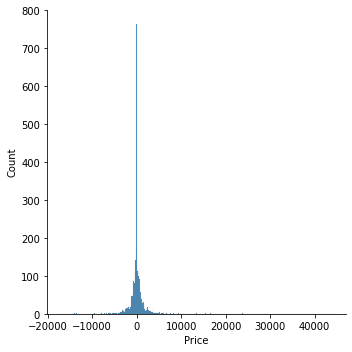

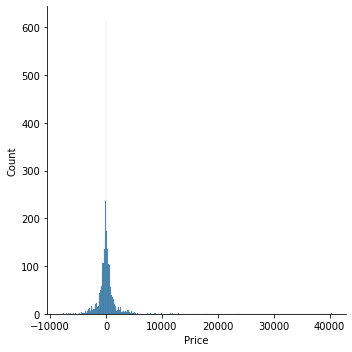

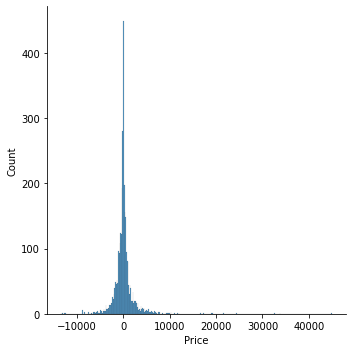

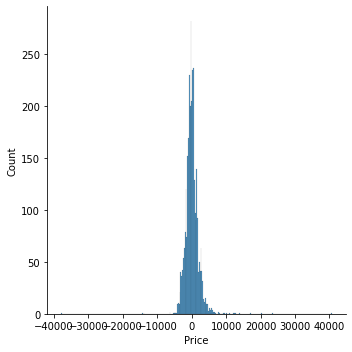

In [132]:
for i in models:
  mdl = i.fit(X_train2, Y_train2)
  print('Model is : ', i)
  print('Training score: ',mdl.score(X_train2,Y_train2))
  pred = mdl.predict(X_test2)
  print("R2 score: ", (r2_score(Y_test2,pred)))
  print("MAE: ", (mean_absolute_error(Y_test2,pred)))
  print("MSE: ", (mean_squared_error(Y_test2,pred)))
  sns.displot(Y_test2-pred)

Now RandomForestRegressor gives best R2 score, MAE, MSE though training score is a bit reduced.

#Pipeline

In [137]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [138]:
pl = Pipeline([ ('scaler', StandardScaler()), ('classifier', RFR()) ])
pl.fit(X_train, Y_train)
pl.score(X_test, Y_test)

0.877131275071811

In [139]:
numeric_preprocessor = Pipeline([ ("scaler", StandardScaler()) ])
categoric_preprocessor = Pipeline([ ("encoder", LabelEncoder()) ])

In [162]:
preprocessor = ColumnTransformer( [ ("categorical", categoric_preprocessor, col), ("numerical", numeric_preprocessor, cols), ] )

pipe = make_pipeline(preprocessor, RFR())

In [163]:
set_config(display="diagram")
pipe 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   LabelEncoder())]),
                                                  ['Airline', 'Source',
                                                   'Destination', 'Total_Stops',
                                                   'Additional_Info', 'city1',
                                                   'city2', 'city3', 'city4',
                                                   'city5']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Dur_hours', 'Dur_mins',
                                                   'Dep_hour', 'Dep_min',
                                                   'Arr_hour', 'Arr_min'])])),
                ('randomforestregressor', RandomForestRegressor())])